In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
%matplotlib inline

# A Basic Tactical Scheduling Analysis Example
The multiweek tour scheduling model (MWTS) was developed to use for *tactical scheduling analysis* problems. The focus of such problems is on evaluation and comparison of different staff scheduling policies and practices. Metrics for comparison might include overall staffing costs, understaffing levels, and schedule quality. Tactical scheduling models are not really intended for use in the ongoing process of creating tour schedules for a fixed cohort of staff - a process we call *operational scheduling*. However, tactical scheduling models such as MWTS do indeed produce actual multiweek tour schedules. These schedules supplement broader model output metrics such as staffing costs by showing concrete examples of how a given scheduling policy might actually be implemented in practice. So, let's see an example of a basic tactical scheduling analysis problem in which we evaluate the relative merits of various mixes of full and part-time tours and use of multiple shift lengths.

This notebook is **not** intended to be a in-depth description of the MWTS model. For that, see our paper at - LINK TO PAPER. Single week versions of this model were used in numerous real scheduling analysis projects and the technical details of that model can be found in this eariler paper - LINK to AOR paper. Instead, we are just showing how such a model gets used in practice. 

## The PACU staffing targets

For this example, we will use staffing requirements from a hospital post-anesthesia care unit (PACU). Let's assume that staffing level targets by half-hour for each day of the week have already been set from some previous analysis. As you can see from the following plot, PACU staffing targets exhibit signfificant time of day and day of week effects.

In [3]:
# Plot of PACU demand

## Tour types
Currently our PACU is staffed with full-time nurses who each work five, eight-hour shifts, each week. Let's call this *tour type 1*, or TT1 for short. We would like to consider using other tour types such as part-time tours or the use of ten-hour shifts. For this example, we are going to look at combinations of the following three tour types:

* **TT1** - full-time, five eight-hour shifts worked each week
* **TT2** - part-time, five eight-hour shifts worked **every other** week (with a minimum of two and a maximum of three shifts worked each week)
* **TT2** - full-time, four ten-hour shifts worked each week

We are curious if the use of TT2 and/or TT3 will allow us to better meet the variable staffing targets of our PACU.

## Other scheduling policy parameters
We are only varying the mix of tour types in this example. Other scheduling inputs are held fixed across the different scenarios. These inputs include:

* **Scheduling horizon** - Four weeks, each day is made up of forty-eight half-hour periods
* **Allowable shift start times** - Shifts can start on any half hour of the day except those resulting in a shift ending between midnight and 5am. Within each tour, each shift starts at the same time each day.
* **Staffing costs** - Just using a sum of number of periods scheduled. The model can handle different tour type specific costs but we won't consider that here.
* **Understaffing costs** - We put relatively high penalties on understaffing.
* **Weekend policies** - People can work a maximum of four weekend days over four weeks and maximum of two weekends in which at least one of the days is worked.

## Scenario analysis
Ok, let's look at a few different combinations of allowable tour types and see how they compare in terms of total staffing costs as well as amount of understaffing. For each scenario we have created a data input file in the well known AMPL `dat` format (link to reference). We will generate and solve the MWTS model for each scenario and compare the outputs.

### Technical preamble
If you want to get this notebook and associated data files and try this for yourself, you'll need to do a few things. This notebook assumes you are already comfortable with using Python (the [Anaconda distribution](https://www.anaconda.com/products/individual) is recommended) and familiar with optimization software (e.g. CBC, glpk, or Gurobi), `git`, Github, installing Python programs using `pip`, Python virtual environments, and running programs from a command shell. I use Ubuntu Linux and this example is Linux based. Of course you can just read through the notebook to get the gist of it.

* Need to have either CBC, glpk or Gurobi installed and available to use as the mixed-integer programming solver
* Clone or download the source code from https://github.com/misken/pymwts 
* Open a command shell in the main project director `pymtws/`.

It is recommended to create a virtual environment within which to install `pymwts` to avoid adding such tools to your base Python environment. Then just use `pip` to install it and navigate to the `examples/` subfolder after installation is complete. The `pymwts` package depends on a few other Python packages, namely, [pandas](https://pandas.pydata.org/) and [pyomo](http://www.pyomo.org/). Both of these will get installed automatically if they aren't already installed.

* `pip install .`
* `cd examples`

This notebook and the data files are in this `examples/` folder and the `examples/inputs/` subfolder, respectively.

After installing `pymwts`, you can run it from a command shell. Let's run it with the `-h` flag to get the help info about `pymwts`.

In [4]:
!pymwts -h

usage: pymwts [-h] [-p PATH] [-s {cbc,glpk,gurobi}] [-t TIMELIMIT] [-g MIPGAP]
              [--version]
              scenario phase1dat

Solve a multi-week tour scheduling problem.

positional arguments:
  scenario              Short string to be used in output filenames
  phase1dat             DAT file for phase 1

optional arguments:
  -h, --help            show this help message and exit
  -p PATH, --path PATH  Relative path to output file directory. Terminate with
                        /
  -s {cbc,glpk,gurobi}, --solver {cbc,glpk,gurobi}
                        cbc, glpk or gurobi for now
  -t TIMELIMIT, --timelimit TIMELIMIT
                        seconds
  -g MIPGAP, --mipgap MIPGAP
                        Can prevent really long run times.
  --version             show program's version number and exit

May the force be with you.


### Scenario 1 - TT1 only
In this first scenario we will only use TT1 tour types (full-time, five eight-hour shifts per week). This scenario represents the case of the least scheduling flexibility that we'll consider in this analysis. The AMPL data file is named `scenario1_tt1.dat` and is in the `inputs/` subdirectory. The scenario name will be `scenario1_tt1`. We'll set a `timelimit` of 600 seconds and set the `mipgap` to 2%. We will specify that the output files should get written to the `output/` subdirectory. I'm using the Gurobi solver (academic edition). When we run this, we'll see a bunch of output generated by Pyomo, by the solver, and by various pieces of the `pymwts` package. In addition, numerous output files are generated and we'll be using some of these in our analysis. We'll know that everything solved correctly if the last bit of output to the screen is 'Output files created'.

In [5]:
!pymwts scenario1_tt1 ./input/scenario1_tt1.dat -s gurobi -p ./output/ -t 600 -g 0.02

Namespace(mipgap=0.02, path='./output/', phase1dat='./input/scenario1_tt1.dat', scenario='scenario1_tt1', solver='gurobi', timelimit=600)

*** Scenario scenario1_tt1


*** Phase 1 model instance created.


*** Setting up the solver.


*** Starting to solve Phase 1 model

Academic license - for non-commercial use only
Read LP format model from file /tmp/tmpvofaxno2.pyomo.lp
Reading time = 0.11 seconds
x15933: 20356 rows, 15933 columns, 213529 nonzeros
Changed value of parameter mipgap to 0.02
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timelimit to 600.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 20356 rows, 15933 columns and 213529 nonzeros
Variable types: 9409 continuous, 6524 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 14929 rows and 11257 columns
Presolve time:

#### Scenario 1 summary
A number of output files get created by `pymwts`. Here's a listing:

In [6]:
!ls output/scenario1*

output/scenario1_tt1.log
output/scenario1_tt1_phase1_capsum.csv
output/scenario1_tt1_phase1_results.yml
output/scenario1_tt1_phase1_shiftsum.csv
output/scenario1_tt1_phase1_summary.txt
output/scenario1_tt1_phase1_tourskeleton.csv
output/scenario1_tt1_phase2.dat
output/scenario1_tt1_phase2_ftesum.csv
output/scenario1_tt1_phase2_mwt.csv
output/scenario1_tt1_phase2_results.yml
output/scenario1_tt1_phase2_summary.txt
output/scenario1_tt1_phase2_toursum.csv
output/scenario1_tt1_phase2_tourtypesum.csv
output/scenario1_tt1_phase2_tur.csv
output/scenario1_tt1.tur


Let's look at the FTE (full time equivalent) summary:

In [7]:
ftesum_1 = pd.read_csv('output/scenario1_tt1_phase2_ftesum.csv') 
ftesum_1

,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,tot_dmd,sched_eff,tot_periods_us,scenario
0,49,15680,980,7840.0,49.0,12800,0.816327,133.0,scenario1_tt1


A total of 49 tours were created. Since each tour is a full-time person, we see that this scenario results in a total of 49.0 FTEs. There's a similar output file that includes the same measures broken down by tour type. Obviously, this will be more useful in subsequent scenarios in which we use multiple tour types.

In [8]:
tourtypesum_1 = pd.read_csv('output/scenario1_tt1_phase2_tourtypesum.csv') 
tourtypesum_1

,tourtype,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,scenario
0,1,49,15680,980,7840.0,49.0,scenario1_tt1


Let's also show a plot of scheduled capacity superimposed on the underlying staffing targets (for one week).

In [9]:
# Plot of cap and demand
capacity1_df = pd.read_csv('output/scenario1_tt1_phase1_capsum.csv')
capacity1_df = capacity1_df.loc[capacity1_df['week'] == 1]
capacity1_df = capacity1_df.sort_values(by=['day', 'period'])
capacity1_df

,period,day,week,dmd,cap,us1,us2,ustot
0,1,1,1,3,2.0,1.0,0.0,1.0
28,2,1,1,3,2.0,1.0,0.0,1.0
56,3,1,1,3,2.0,1.0,0.0,1.0
84,4,1,1,3,2.0,1.0,0.0,1.0
112,5,1,1,3,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1228,44,7,1,6,6.0,0.0,0.0,0.0
1256,45,7,1,2,5.0,0.0,0.0,0.0
1284,46,7,1,2,3.0,-0.0,0.0,0.0
1312,47,7,1,2,3.0,0.0,0.0,0.0


Since we will want to do one plot per scenario, we'll create a plotting function that we can reuse.

In [10]:
def capacity_plot(capacity_df, scenario_title, ax):

    # Create a list to use as the X-axis values
    #-------------------------------------------

    timestamps = pd.date_range('01/05/2015', periods=336, freq='30Min')

    major_tick_locations = pd.date_range('01/05/2015 12:00:00', periods=7, freq='24H').tolist()
    minor_tick_locations = pd.date_range('01/05/2015 06:00:00', periods=28, freq='6H').tolist()

    # Specify the mean occupancy and percentile values
    #-----------------------------------------------------------
    staffing_target = capacity_df['dmd']
    capacity = capacity_df['cap']

    # Styling of bars, lines, plot area
    #-----------------------------------

    # Style the bars for staffing targets
    bar_color = 'grey'
    bar_opacity = 0.8

    # Style the line for the scheduled capacity
    cap_line_style = '-'
    cap_color = '#dd4814'
    cap_line_width = 1

    # Set the background color of the plot. Argument is a string float in
    # (0,1) representing greyscale (0=black, 1=white)
    ax.patch.set_facecolor('0.95')

    # Can also use color names or hex color codes
    # ax2.patch.set_facecolor('yellow')
    # ax2.patch.set_facecolor('#FFFFAD')


    # Add data to the plot
    #--------------------------

    # Mean occupancy as bars - here's the GOTCHA involving the bar width
    ax.bar(timestamps.values, staffing_target, color=bar_color, alpha=bar_opacity, label='Staffing targets', width=1/48)

    # Some percentile as a line
    ax.plot(timestamps.values, capacity, linestyle=cap_line_style, linewidth=cap_line_width, color=cap_color, \
             label='Scheduled capacity')


    # Create formatter variables
    dayofweek_formatter = DateFormatter('%a')
    qtrday_formatter = DateFormatter('%H')

    # Set the tick locations for the axes object

    ax.set_xticks(major_tick_locations)
    ax.set_xticks(minor_tick_locations, minor=True)

    # Format the tick labels
    ax.xaxis.set_major_formatter(dayofweek_formatter)
    ax.xaxis.set_minor_formatter(qtrday_formatter)

    # Slide the major tick labels underneath the default location by 20 points
    ax.tick_params(which='major', pad=20)

    # Add other chart elements
    #-------------------------

    # Set plot and axis titles
    ax.set_title(scenario_title, fontsize=18)
    ax.set_xlabel('Time Bin of Week', fontsize=14)
    ax.set_ylabel('Staff level', fontsize=14)

    # Gridlines
    ax.grid(True, color='0.5')

    # Legend
    leg = ax.legend(loc='best', frameon=True, fontsize=20)
    leg.get_frame().set_facecolor('white')
    
    return ax

Now we can call our function to create the capacity plot for Scenario 1.

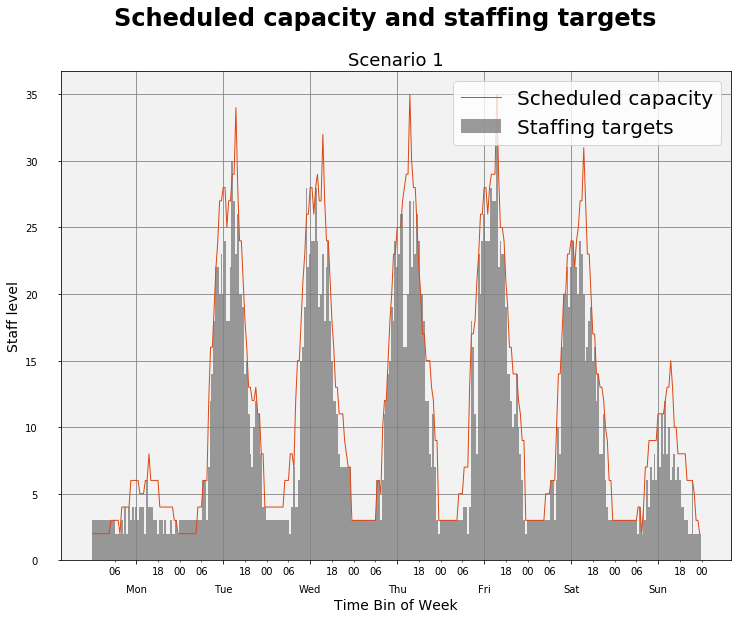

In [11]:
# Create a Figure and Axes object and call plot function
fig1 = plt.figure()
fig1.set_size_inches(12, 9)
fig1.suptitle('Scheduled capacity and staffing targets', fontsize=24, fontweight='bold')
ax1 = fig1.add_subplot(1,1,1)

capacity_plot(capacity1_df, 'Scenario 1', ax1);


Note that there's quite a bit of overstaffing due to the lack of flexibility of only being allowed to use full-time, eight-hour tours. Now, let's move on to the next scenario.

### Scenario 2 - TT1 and TT2
In addition to TT1, we now allow part-time staff through TT2. A limit on the total percentage of scheduled hours attributable to TT2 was set to 40%. As part-time tour types provide additional flexibility in meeting highly variable demand patterns, we often end up with solutions using almost all part-time tours, which might not be practical nor desirable.

In [12]:
!pymwts scenario2_tt12 ./input/scenario2_tt12.dat -s gurobi -p ./output/ -t 600 -g 0.02

Namespace(mipgap=0.02, path='./output/', phase1dat='./input/scenario2_tt12.dat', scenario='scenario2_tt12', solver='gurobi', timelimit=600)

*** Scenario scenario2_tt12


*** Phase 1 model instance created.


*** Setting up the solver.


*** Starting to solve Phase 1 model

Academic license - for non-commercial use only
Read LP format model from file /tmp/tmpv1jqlw6c.pyomo.lp
Reading time = 0.25 seconds
x23945: 31303 rows, 23945 columns, 568937 nonzeros
Changed value of parameter mipgap to 0.02
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timelimit to 600.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 31303 rows, 23945 columns and 568937 nonzeros
Variable types: 9409 continuous, 14536 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 22851 rows and 17116 columns
Presolve t

#### Scenario 2 summary

In [13]:
ftesum_2 = pd.read_csv('output/scenario2_tt12_phase2_ftesum.csv') 
ftesum_2

,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,tot_dmd,sched_eff,tot_periods_us,scenario
0,64,14720,920,7360.0,46.0,12800,0.869565,76.0,scenario2_tt12


In [14]:
tourtypesum_2 = pd.read_csv('output/scenario2_tt12_phase2_tourtypesum.csv') 
tourtypesum_2

,tourtype,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,scenario
0,1,28,8960,560,4480.0,28.0,scenario2_tt12
1,2,36,5760,360,2880.0,18.0,scenario2_tt12


The ability to use part-time tours resulted in a savings of 3.0 FTEs. Note that the maximum level (40%) of part-time staff was used in the solution.

Create the capacity plot.

In [15]:
# Plot of cap and demand
capacity2_df = pd.read_csv('output/scenario2_tt12_phase1_capsum.csv')
capacity2_df = capacity2_df.loc[capacity2_df['week'] == 1]
capacity2_df = capacity2_df.sort_values(by=['day', 'period'])

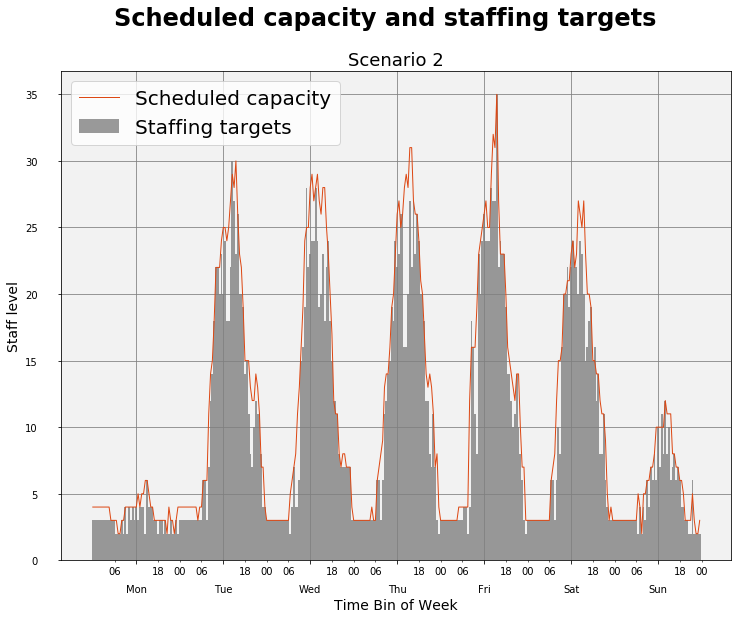

In [16]:
# Create a Figure and Axes object and call plot function
fig2 = plt.figure()
fig2.set_size_inches(12, 9)
fig2.suptitle('Scheduled capacity and staffing targets', fontsize=24, fontweight='bold')
ax2 = fig2.add_subplot(1,1,1)

capacity_plot(capacity2_df, 'Scenario 2', ax2);


Comparing this plot to the first plot, we see a large reduction in overstaffing. Actually, understaffing appears to be significantly reduced as well. The addition of part-time tours has helped us match the highly variable PACU demand profile.

### Scenario 3 - TT1, TT2, and TT3
Now let's add a full-time ten-hour tour type to the mix. Perhaps the additional flexibility of a second shift length will let us match the demand variability more closely.

In [17]:
!pymwts scenario3_tt123 ./input/scenario3_tt123.dat -s gurobi -p ./output/ -t 600 -g 0.02

Namespace(mipgap=0.02, path='./output/', phase1dat='./input/scenario3_tt123.dat', scenario='scenario3_tt123', solver='gurobi', timelimit=600)

*** Scenario scenario3_tt123


*** Phase 1 model instance created.


*** Setting up the solver.


*** Starting to solve Phase 1 model

Academic license - for non-commercial use only
Read LP format model from file /tmp/tmpx_oorm_v.pyomo.lp
Reading time = 0.25 seconds
x30469: 42249 rows, 30469 columns, 769053 nonzeros
Changed value of parameter mipgap to 0.02
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timelimit to 600.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 42249 rows, 30469 columns and 769053 nonzeros
Variable types: 9409 continuous, 21060 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 29799 rows and 21412 columns
Presolv

#### Scenario 3 summary

As we see below, the addition of TT3 allowed a reduction of 0.5 FTEs and a reduction in the number of understaffed periods. The ability to use different shift lengths will often help in matching highly variable demand patterns.

In [18]:
ftesum_3 = pd.read_csv('output/scenario3_tt123_phase2_ftesum.csv')
ftesum_3

,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,tot_dmd,sched_eff,tot_periods_us,scenario
0,63,14560,814,7280.0,45.5,12800,0.879121,59.0,scenario3_tt123


In [19]:
tourtypesum_3 = pd.read_csv('output/scenario3_tt123_phase2_tourtypesum.csv') 
tourtypesum_3

,tourtype,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,scenario
0,1,4,1280,80,640.0,4.0,scenario3_tt123
1,2,35,5600,350,2800.0,17.5,scenario3_tt123
2,3,24,7680,384,3840.0,24.0,scenario3_tt123


In [20]:
# Plot of cap and demand
capacity3_df = pd.read_csv('output/scenario3_tt123_phase1_capsum.csv')
capacity3_df = capacity3_df.loc[capacity3_df['week'] == 1]
capacity3_df = capacity3_df.sort_values(by=['day', 'period'])

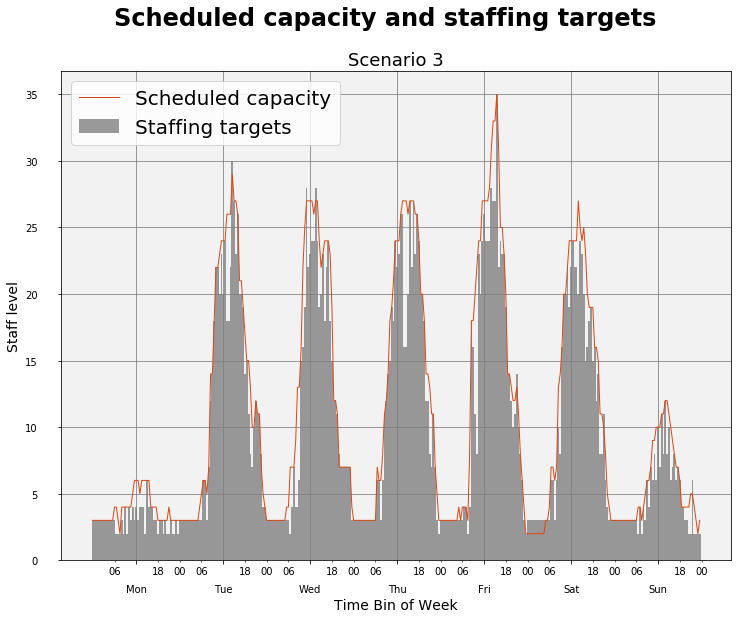

In [21]:
# Create a Figure and Axes object and call plot function
fig3 = plt.figure()
fig3.set_size_inches(12, 9)
fig3.suptitle('Scheduled capacity and staffing targets', fontsize=24, fontweight='bold')
ax3 = fig3.add_subplot(1,1,1)

capacity_plot(capacity3_df, 'Scenario 3', ax3);


### Scenario 4 - TT1 and TT3
Finally, let's consider a scenario in which only full-time tours are allowed - TT1 and TT3.

In [22]:
!pymwts scenario4_tt13 ./input/scenario4_tt13.dat -s gurobi -p ./output/ -t 600 -g 0.02

Namespace(mipgap=0.02, path='./output/', phase1dat='./input/scenario4_tt13.dat', scenario='scenario4_tt13', solver='gurobi', timelimit=600)

*** Scenario scenario4_tt13


*** Phase 1 model instance created.


*** Setting up the solver.


*** Starting to solve Phase 1 model

Academic license - for non-commercial use only
Read LP format model from file /tmp/tmpn_9ebqls.pyomo.lp
Reading time = 0.14 seconds
x22457: 31302 rows, 22457 columns, 412833 nonzeros
Changed value of parameter mipgap to 0.02
   Prev: 0.0001  Min: 0.0  Max: 1e+100  Default: 0.0001
Changed value of parameter timelimit to 600.0
   Prev: 1e+100  Min: 0.0  Max: 1e+100  Default: 1e+100
Optimize a model with 31302 rows, 22457 columns and 412833 nonzeros
Variable types: 9409 continuous, 13048 integer (0 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [6e+00, 2e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+05]
Presolve removed 22465 rows and 16141 columns
Presolve t

#### Scenario 4 summary

The addition of TT3 to TT1 leads to a 2.0 FTE savings from Scenario 1 but is a higher cost solution than Scenario 2. Of course, Scenario 3 will have the lowest cost as it has the maximum level of scheduling flexibility considered in this analysis. 

In [23]:
ftesum_4 = pd.read_csv('output/scenario4_tt13_phase2_ftesum.csv') 

In [24]:
tourtypesum_4 = pd.read_csv('output/scenario4_tt13_phase2_tourtypesum.csv') 
tourtypesum_4

,tourtype,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,scenario
0,1,19,6080,380,3040.0,19.0,scenario4_tt13
1,3,28,8960,448,4480.0,28.0,scenario4_tt13


In [26]:
# Plot of cap and demand
capacity4_df = pd.read_csv('output/scenario4_tt13_phase1_capsum.csv')
capacity4_df = capacity4_df.loc[capacity4_df['week'] == 1]
capacity4_df = capacity4_df.sort_values(by=['day', 'period'])

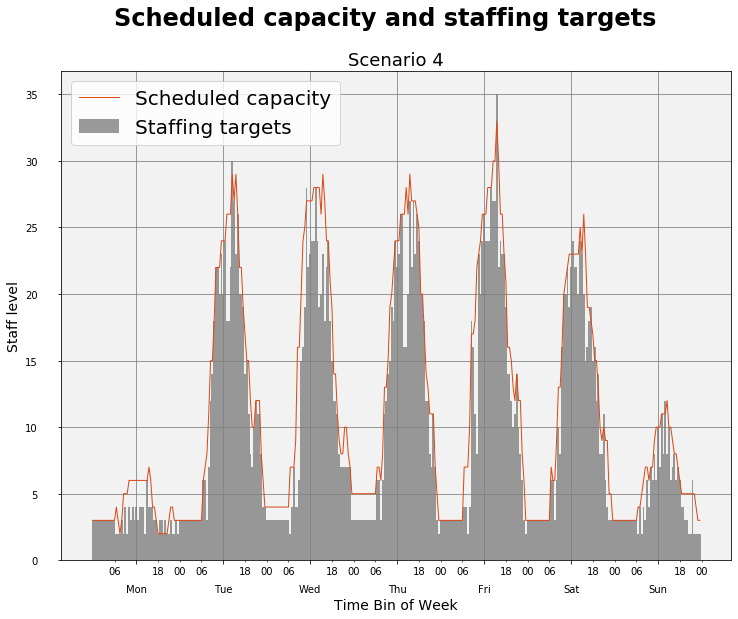

In [27]:
# Create a Figure and Axes object and call plot function
fig4 = plt.figure()
fig4.set_size_inches(12, 9)
fig4.suptitle('Scheduled capacity and staffing targets', fontsize=24, fontweight='bold')
ax4 = fig4.add_subplot(1,1,1)

capacity_plot(capacity4_df, 'Scenario 4', ax4);


Let's look at all four FTE summaries:

In [25]:
ftesum = pd.concat([ftesum_1, ftesum_2, ftesum_3, ftesum_4], ignore_index=True)
ftesum

,num_tours,tot_periods,tot_shifts,tot_hours,tot_ftes,tot_dmd,sched_eff,tot_periods_us,scenario
0,49,15680,980,7840.0,49.0,12800,0.816327,133.0,scenario1_tt1
1,64,14720,920,7360.0,46.0,12800,0.869565,76.0,scenario2_tt12
2,63,14560,814,7280.0,45.5,12800,0.879121,59.0,scenario3_tt123
3,47,15040,828,7520.0,47.0,12800,0.851064,67.0,scenario4_tt13


No surprises. Scenario 3, which has the highest level of scheduling flexibility, not only has the lowest staffing level (`tot_ftes`) (equivalently, highest level of scheduling efficiency), it also has the lowest total number of periods of understaffing (`tot_periods_us`).